In [84]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Expressivity

## Untrained

In [85]:
tl1 = loader(data_path("tl_expressivity_width_4_reps_2"))
tl2 = loader(data_path("tl_expressivity_width_5_reps_2"))
tl3 = loader(data_path("tl_expressivity_width_6_reps_2"))
tl4 = loader(data_path("tl_expressivity_width_7_reps_2"))
tl5 = loader(data_path("tl_expressivity_width_8_reps_2"))
tl_dnn = loader(data_path("tl_expressivity_dnn"))

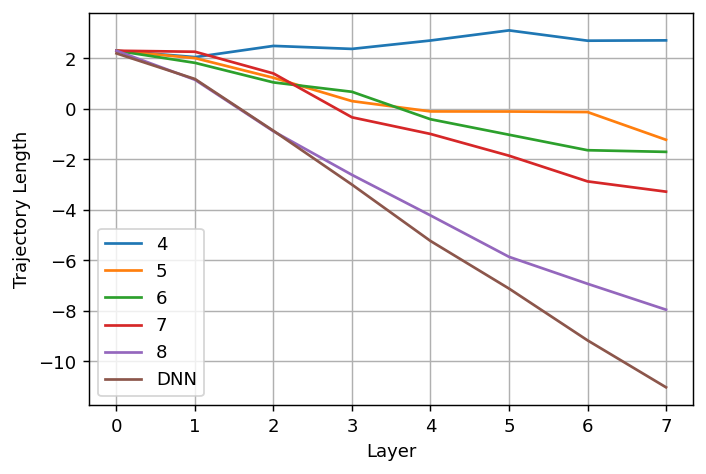

In [86]:
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
plt.plot([np.log(x) for x in tl1.trajectory_length])
plt.plot([np.log(x) for x in tl2.trajectory_length])
plt.plot([np.log(x) for x in tl3.trajectory_length])
plt.plot([np.log(x) for x in tl4.trajectory_length])
plt.plot([np.log(x) for x in tl5.trajectory_length])
plt.plot([np.log(x) for x in tl_dnn.trajectory_length])
plt.xlabel("Layer")
plt.ylabel("Trajectory Length")
plt.legend(["4", "5", "6", "7", "8", "DNN"])
plt.grid()
fig.savefig(image_path("TL_untrained.pdf"), bbox_inches='tight')
plt.show()

(-2.0, 2.0)

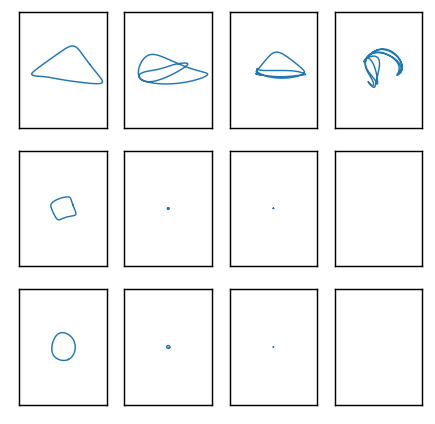

In [91]:
x_proj1 = tl1.trajectory_projection
x_proj2 = tl5.trajectory_projection
x_proj3 = tl_dnn.trajectory_projection

fig, axes = plt.subplots(3, 4, figsize=(4,4), dpi = 130, facecolor='w', edgecolor='k')
for ax1 in axes:
    for ax2 in ax1:
        ax2.set_xticks([])
        ax2.set_yticks([])

lim = [-2,2]

axes[0,0].plot(x_proj1[1][:,0], x_proj1[1][:,1], linewidth=0.8)
axes[0,0].set_xlim(lim); axes[0,0].set_ylim(lim)

axes[0,1].plot(x_proj1[2][:,0], x_proj1[2][:,1], linewidth=0.8)
axes[0,1].set_xlim(lim); axes[0,1].set_ylim(lim)

axes[0,2].plot(x_proj1[3][:,0], x_proj1[3][:,1], linewidth=0.8)
axes[0,2].set_xlim(lim); axes[0,2].set_ylim(lim)

axes[0,3].plot(x_proj1[7][:,0], x_proj1[7][:,1], linewidth=0.8)
axes[0,3].set_xlim(lim); axes[0,3].set_ylim(lim)



axes[1,0].plot(x_proj2[1][:,0], x_proj2[1][:,1], linewidth=0.8)
axes[1,0].set_xlim(lim); axes[1,0].set_ylim(lim)

axes[1,1].plot(x_proj2[2][:,0], x_proj2[2][:,1], linewidth=0.8)
axes[1,1].set_xlim(lim); axes[1,1].set_ylim(lim)

axes[1,2].plot(x_proj2[3][:,0], x_proj2[3][:,1], linewidth=0.8)
axes[1,2].set_xlim(lim); axes[1,2].set_ylim(lim)

axes[1,3].plot(x_proj2[7][:,0], x_proj2[7][:,1], linewidth=0.8)
axes[1,3].set_xlim(lim); axes[1,3].set_ylim(lim)


axes[2,0].plot(x_proj3[1][:,0], x_proj3[1][:,1], linewidth=0.8)
axes[2,0].set_xlim(lim); axes[2,0].set_ylim(lim)

axes[2,1].plot(x_proj3[2][:,0], x_proj3[2][:,1], linewidth=0.8)
axes[2,1].set_xlim(lim); axes[2,1].set_ylim(lim)

axes[2,2].plot(x_proj3[3][:,0], x_proj3[3][:,1], linewidth=0.8)
axes[2,2].set_xlim(lim); axes[2,2].set_ylim(lim)

axes[2,3].plot(x_proj3[7][:,0], x_proj3[7][:,1], linewidth=0.8)
axes[2,3].set_xlim(lim); axes[2,3].set_ylim(lim)

fig.savefig(image_path("TL_untrained_projection.pdf"), bbox_inches='tight')
plt.show()

## Trained

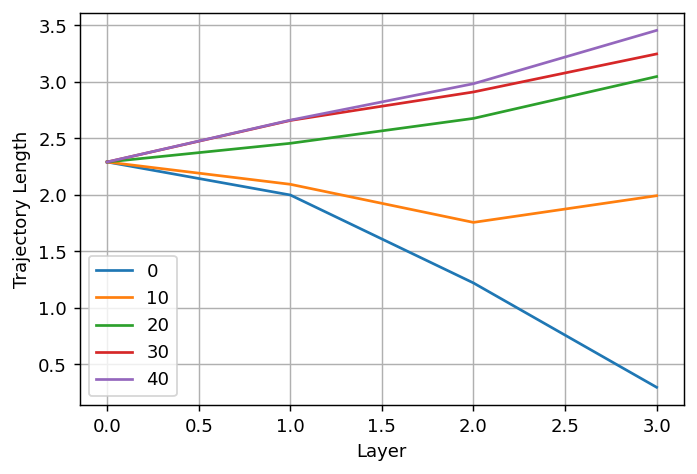

In [46]:
tl1 = loader(data_path("tl_expressivity_epochs_0"))
tl2 = loader(data_path("tl_expressivity_epochs_10"))
tl3 = loader(data_path("tl_expressivity_epochs_20"))
tl4 = loader(data_path("tl_expressivity_epochs_30"))
tl5 = loader(data_path("tl_expressivity_epochs_40"))

fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
x_ticks = [0, 1, 2, 3]
plt.plot(x_ticks, [np.log(x) for x in tl1.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl2.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl3.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl4.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl5.trajectory_length[:-1]])
plt.xlabel("Layer")
plt.ylabel("Trajectory Length")
plt.legend(["0", "10", "20", "30", "40"])
plt.grid()
fig.savefig(image_path("TL_trained_QCN.pdf"), bbox_inches='tight')
plt.show()

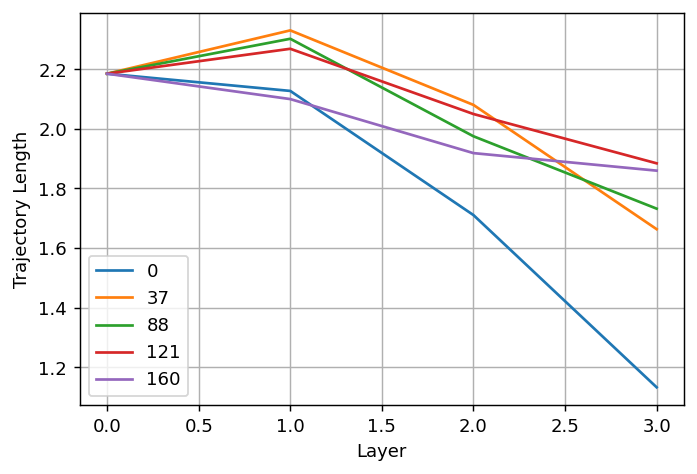

In [47]:
tl1 = loader(data_path("tl_expressivity_epochs_0_dnn"))
tl2 = loader(data_path("tl_expressivity_epochs_37_dnn"))
tl3 = loader(data_path("tl_expressivity_epochs_88_dnn"))
tl4 = loader(data_path("tl_expressivity_epochs_121_dnn"))
tl5 = loader(data_path("tl_expressivity_epochs_160_dnn"))
tl6 = loader(data_path("tl_expressivity_epochs_10160_dnn"))

fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
x_ticks = [0, 1, 2, 3]
#plt.plot(x_ticks, [np.log(x) for x in tl1.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl2.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl3.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl4.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl5.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl6.trajectory_length[:-1]])
plt.xlabel("Layer")
plt.ylabel("Trajectory Length")
plt.legend(["0", "37", "88", "121", "160"])
plt.grid()
fig.savefig(image_path("TL_trained_DNN.pdf"), bbox_inches='tight')
plt.show()